# Fight Price Estimation

This notebook will show the whole process of choosing the best regression modle to estimat the price of flights from 11 diffrint airport in Europ to Riyadh from 1\Dec\2021 to 7\Dec\2021 starting by analizing the data that has been scraped from www.almosafer.com. Then diffrent resression modles will be tested to find the best model that has highest R^2.

The data has been splited into two parts to increase the proces of scrapping using two laptops. First one has scraped the Economym class and the second has scraped the Busniss class for the same period of time and saved as csv. Then, the two DataFramed have been joind using SQLalchemy.

First, starting by importing all needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import math 
import random
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import datetime
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)
from sklearn.metrics import r2_score
%matplotlib inline

sns.set()

In [2]:
#

In [3]:
#

In [4]:
#

In [5]:
#

In [6]:
#

In [7]:
filghts_data_df = pd.read_csv("all_FLIGHTS")
filghts_data_df

,Unnamed: 0,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Baggage,Location,Destination,Price
0,0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (40KG),FRA,RUH,"SAR4,970"
1,1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (20KG),FRA,RUH,"SAR1,808"
2,2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,01:30pm,03:40am,1 Stop,12h 10m,Baggage included (40KG),FRA,RUH,"SAR3,927"
3,3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,06:10pm,05:45am,1 Stop,09h 35m,Baggage included (30KG),FRA,RUH,"SAR1,962"
4,4,BA-903,British Airways,Business,2021-12-01,Wednesday,11:25am,11:40pm,1 Stop,10h 15m,Baggage included (40KG),FRA,RUH,"SAR6,258"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,05:30am,04:40am,2 Stops,20h 10m,Baggage included (23KG),LIS,RUH,"SAR3,749"
3982,3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,07:50am,09:10pm,2 Stops,34h 20m,Baggage included (40KG),LIS,RUH,"SAR3,796"
3983,3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,06:50pm,07:55pm,1 Stop,22h 05m,Baggage included (20KG),LIS,RUH,"SAR5,444"
3984,3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,02:10pm,07:55pm,2 Stops,26h 45m,Baggage included (20KG),LIS,RUH,"SAR5,710"


In [8]:
filghts_data_df.drop("Unnamed: 0",axis='columns', inplace=True)
filghts_df = filghts_data_df.copy()
filghts_df

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Baggage,Location,Destination,Price
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (40KG),FRA,RUH,"SAR4,970"
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (20KG),FRA,RUH,"SAR1,808"
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,01:30pm,03:40am,1 Stop,12h 10m,Baggage included (40KG),FRA,RUH,"SAR3,927"
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,06:10pm,05:45am,1 Stop,09h 35m,Baggage included (30KG),FRA,RUH,"SAR1,962"
4,BA-903,British Airways,Business,2021-12-01,Wednesday,11:25am,11:40pm,1 Stop,10h 15m,Baggage included (40KG),FRA,RUH,"SAR6,258"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,05:30am,04:40am,2 Stops,20h 10m,Baggage included (23KG),LIS,RUH,"SAR3,749"
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,07:50am,09:10pm,2 Stops,34h 20m,Baggage included (40KG),LIS,RUH,"SAR3,796"
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,06:50pm,07:55pm,1 Stop,22h 05m,Baggage included (20KG),LIS,RUH,"SAR5,444"
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,02:10pm,07:55pm,2 Stops,26h 45m,Baggage included (20KG),LIS,RUH,"SAR5,710"


## Data cleaning

In this part, the data will be cleaned to be able to apply regression model

The price column will be converted to numarical, and special character will be removed.

In [9]:
filghts_df['Price_NEW'] = filghts_df['Price'].str.replace('SAR', '').str.replace(',', '').str.replace(' ', '')
filghts_df["Price_NEW"] = pd.to_numeric(filghts_df["Price_NEW"])
filghts_df

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,01:30pm,03:40am,1 Stop,12h 10m,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,06:10pm,05:45am,1 Stop,09h 35m,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,11:25am,11:40pm,1 Stop,10h 15m,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,05:30am,04:40am,2 Stops,20h 10m,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,07:50am,09:10pm,2 Stops,34h 20m,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,06:50pm,07:55pm,1 Stop,22h 05m,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,02:10pm,07:55pm,2 Stops,26h 45m,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


Printing the price detailes such as min,max, amd mean value

In [10]:
filghts_df.describe()

,Price_NEW
count,3986.000000
mean,7504.800803
std,5602.693456
min,1281.000000
25%,2890.000000
50%,6145.000000
75%,10316.500000
max,31662.000000


Cheking if the data has null values

In [11]:
filghts_df.isnull().sum()

Flight_Number       0
Ariline             0
Class               0
Date                0
Day                 0
Time_of_take_off    0
Time_of_arrival     0
Number_of_Stops     0
Duration            0
Baggage             0
Location            0
Destination         0
Price               0
Price_NEW           0
dtype: int64

From above we can see that the data has no nulls

Next, the types of the data in each column is the follwing

In [12]:
filghts_df.dtypes

Flight_Number       object
Ariline             object
Class               object
Date                object
Day                 object
Time_of_take_off    object
Time_of_arrival     object
Number_of_Stops     object
Duration            object
Baggage             object
Location            object
Destination         object
Price               object
Price_NEW            int64
dtype: object

As we can we have only one numirical value wich is the price, which means some effort will be needed to increase the number of numarical columns such as the Duration column will be converted to minutes and numirical as bellow.

In [13]:
filghts_df.insert (9, "Duration_Minutes", filghts_df["Duration"])
filghts_df['Duration_Minutes'] = filghts_df['Duration'].apply(lambda x : (int(x.split(' ')[0][0:-1])*60) + int(x.split(' ')[1][0:-1]))
filghts_df["Duration_Minutes"] = pd.to_numeric(filghts_df["Duration_Minutes"])
filghts_df

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,01:30pm,03:40am,1 Stop,12h 10m,730,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,06:10pm,05:45am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,11:25am,11:40pm,1 Stop,10h 15m,615,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,05:30am,04:40am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,07:50am,09:10pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,06:50pm,07:55pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,02:10pm,07:55pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


For now, that was the only column that could be convertid to numatical

Analizing the unique values of each column

In [14]:
for i in filghts_df.columns:
    print('{} has total {} categories'.format(i,len(filghts_df[i].value_counts())))

Flight_Number has total 581 categories
Ariline has total 23 categories
Class has total 2 categories
Date has total 7 categories
Day has total 7 categories
Time_of_take_off has total 211 categories
Time_of_arrival has total 65 categories
Number_of_Stops has total 4 categories
Duration has total 340 categories
Duration_Minutes has total 340 categories
Baggage has total 10 categories
Location has total 11 categories
Destination has total 1 categories
Price has total 1704 categories
Price_NEW has total 1704 categories


In [15]:
Economy_df = filghts_df[filghts_df.Class == "Economy"]
Business_df = filghts_df[filghts_df.Class == "Business"]

In [16]:
Economy_df.describe()

,Duration_Minutes,Price_NEW
count,2484.000000,2484.000000
mean,967.966989,4782.933977
std,446.418185,3613.890276
min,335.000000,1281.000000
25%,650.000000,2463.000000
50%,825.000000,3321.500000
75%,1175.000000,5959.000000
max,2970.000000,23628.000000


In [17]:
Business_df.describe()

,Duration_Minutes,Price_NEW
count,1502.000000,1502.000000
mean,992.605859,12006.210386
std,528.477500,5403.378236
min,335.000000,2735.000000
25%,620.000000,8445.000000
50%,760.000000,10347.500000
75%,1338.750000,15042.000000
max,3305.000000,31662.000000


From above two tabels, it is clear that there are outliers thaat are too far from the mean of the price. Therefore, the next step will be ploting the boxplot to visualize the outliers.

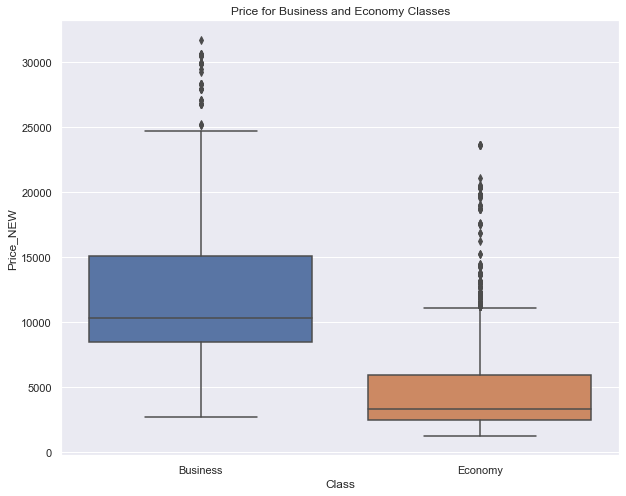

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Class',y='Price_NEW',data=filghts_df.sort_values('Price_NEW',ascending=False));
plt.title('Price for Business and Economy Classes');

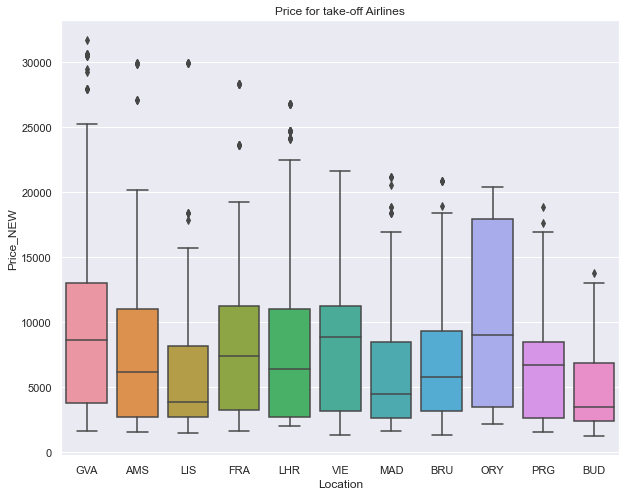

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Location',y='Price_NEW',data=filghts_df.sort_values('Price_NEW',ascending=False));
plt.title('Price for take-off Airlines');

Since we have some flights that has very high price compaired with other we need to have a look on them befor dropping them.

In [20]:
Business_df[Business_df.Price_NEW > 27000]

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
48,EK-48,Emirates,Business,2021-12-01,Wednesday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
106,EK-48,Emirates,Business,2021-12-02,Thursday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
150,EK-48,Emirates,Business,2021-12-03,Friday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
198,EK-48,Emirates,Business,2021-12-04,Saturday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
256,EK-48,Emirates,Business,2021-12-05,Sunday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
290,EK-48,Emirates,Business,2021-12-06,Monday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
336,EK-48,Emirates,Business,2021-12-07,Tuesday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (40KG),FRA,RUH,"SAR28,316",28316
866,AF-1243,Saudia,Business,2021-12-01,Wednesday,07:20am,07:15pm,1 Stop,09h 55m,595,Baggage included (46KG),GVA,RUH,"SAR27,932",27932
868,BA-723,Saudia,Business,2021-12-01,Wednesday,06:55am,07:15pm,1 Stop,10h 20m,620,Baggage included (46KG),GVA,RUH,"SAR30,477",30477
871,AF-1743,Saudia,Business,2021-12-01,Wednesday,01:00pm,04:40am,2 Stops,13h 40m,820,Baggage included (46KG),GVA,RUH,"SAR30,626",30626


we will drop 36 rows from the business class which concedered outliers.

In [21]:
Economy_df[Economy_df.Price_NEW > 15000]

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
96,EK-48,Emirates,Economy,2021-12-01,Wednesday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
206,EK-48,Emirates,Economy,2021-12-02,Thursday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
280,EK-48,Emirates,Economy,2021-12-03,Friday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
374,LH-9654,Etihad Airways,Economy,2021-12-04,Saturday,01:05pm,02:10am,1 Stop,11h 05m,665,Baggage included (20KG),FRA,RUH,"SAR16,877",16877
376,EK-48,Emirates,Economy,2021-12-04,Saturday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
469,LH-9654,Etihad Airways,Economy,2021-12-05,Sunday,01:05pm,02:10am,1 Stop,11h 05m,665,Baggage included (20KG),FRA,RUH,"SAR16,877",16877
470,EK-48,Emirates,Economy,2021-12-05,Sunday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
546,EK-48,Emirates,Economy,2021-12-06,Monday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
628,EK-48,Emirates,Economy,2021-12-07,Tuesday,09:20pm,11:55am,1 Stop,12h 35m,755,Baggage included (35KG),FRA,RUH,"SAR23,628",23628
1320,AF-1243,Saudia,Economy,2021-12-01,Wednesday,07:20am,07:15pm,1 Stop,09h 55m,595,Baggage included (46KG),GVA,RUH,"SAR18,711",18711


Also, we will drop 51 rows from the Economy class which are concedered outliers.

In [22]:
filghts_df = filghts_df[((filghts_df.Class == "Economy") & (filghts_df.Price_NEW < 15000))|((filghts_df.Class == "Business") & (filghts_df.Price_NEW < 27000))]
filghts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 3985
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Flight_Number     3899 non-null   object
 1   Ariline           3899 non-null   object
 2   Class             3899 non-null   object
 3   Date              3899 non-null   object
 4   Day               3899 non-null   object
 5   Time_of_take_off  3899 non-null   object
 6   Time_of_arrival   3899 non-null   object
 7   Number_of_Stops   3899 non-null   object
 8   Duration          3899 non-null   object
 9   Duration_Minutes  3899 non-null   int64 
 10  Baggage           3899 non-null   object
 11  Location          3899 non-null   object
 12  Destination       3899 non-null   object
 13  Price             3899 non-null   object
 14  Price_NEW         3899 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 487.4+ KB


In [23]:
filghts_df

,Flight_Number,Ariline,Class,Date,Day,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,01:30pm,03:40am,1 Stop,12h 10m,730,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,06:10pm,05:45am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,11:25am,11:40pm,1 Stop,10h 15m,615,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,05:30am,04:40am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,07:50am,09:10pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,06:50pm,07:55pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,02:10pm,07:55pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


Plotting the boxplot again after cleaning the data

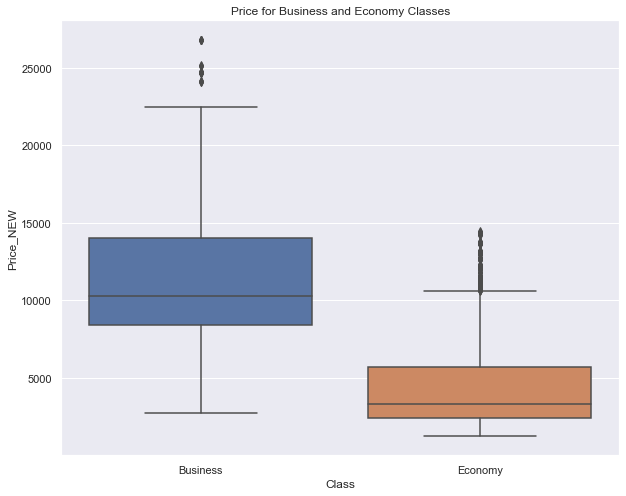

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Class',y='Price_NEW',data=filghts_df.sort_values('Price_NEW',ascending=False));
plt.title('Price for Business and Economy Classes');

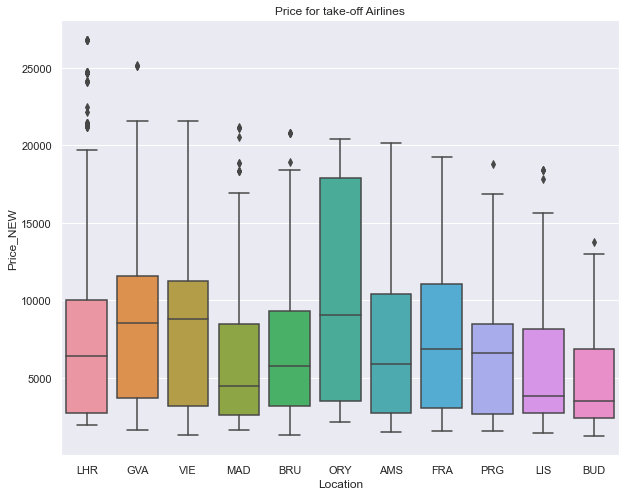

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Location',y='Price_NEW',data=filghts_df.sort_values('Price_NEW',ascending=False));
plt.title('Price for take-off Airlines');

The best way to analize the data is by ploting the relation between the unique values and the price as bellow, but the analysis will be seperated for the Economy and the Business class, becouse the price gap between the two classes is very high.

Fist plot, the relation between the day of week and the avarige price for the Economy and the Business.

In [26]:
Economy_df = filghts_df[filghts_df.Class == "Economy"]
Business_df = filghts_df[filghts_df.Class == "Business"]

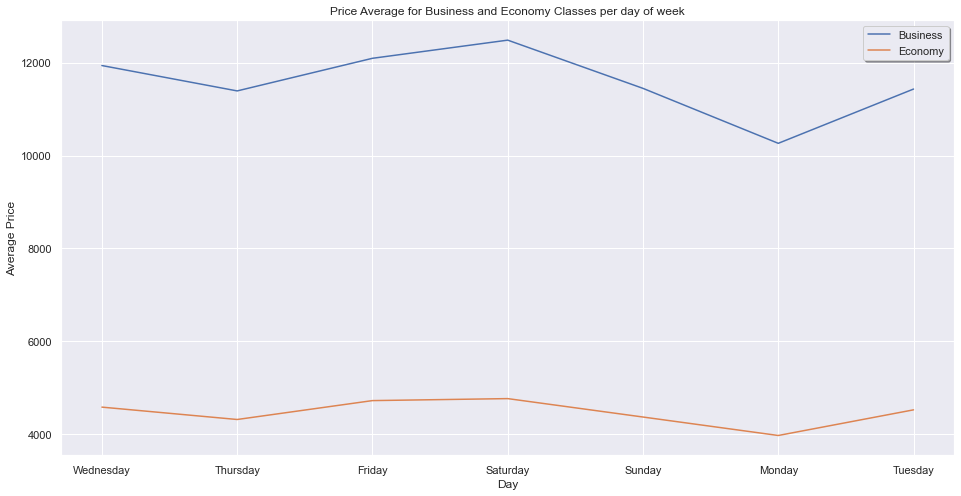

In [27]:
#figure one
plt.figure(figsize=(16,8))
plt.plot(Business_df['Day'].unique(),Business_df.groupby("Day")['Price_NEW'].mean())
plt.plot(Economy_df['Day'].unique(),Economy_df.groupby("Day")['Price_NEW'].mean())
plt.ylabel('Average Price')
plt.xlabel('Day')
plt.legend(['Business','Economy'],shadow = True, loc = 0);
plt.title('Price Average for Business and Economy Classes per day of week');

As shown above, the highest price is at Saturday which is the common weekend day between Saudi Arabia and Europ.

Second plot between the airport that the plane will take-off from and the avarige price for the Economy and the Business.

In [28]:
Economy_df_location = (Economy_df.groupby(["Location"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
Business_df_location = (Business_df.groupby(["Location"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
Economy_df_location

,Location,Price_NEW
3,FRA,5853.960784
10,VIE,5621.262948
8,ORY,5174.602941
4,GVA,4752.433498
0,AMS,4519.810219
1,BRU,4486.167464
5,LHR,4179.589744
9,PRG,3805.980296
6,LIS,3798.921311
7,MAD,3382.253659


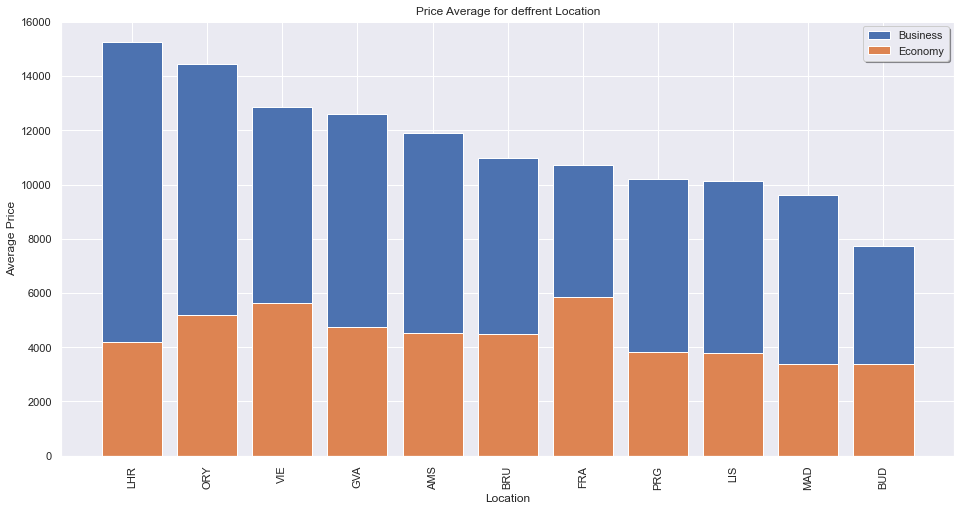

In [29]:
plt.figure(figsize=(16,8))
plt.bar(Business_df_location['Location'].unique(),Business_df_location["Price_NEW"])
plt.bar(Economy_df_location['Location'].unique(),Economy_df_location["Price_NEW"])
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.xlabel('Location')
plt.legend(['Business','Economy'],shadow = True, loc = 0);
plt.title('Price Average for deffrent Location');

In [30]:
filghts_df_location = (filghts_df.groupby(["Location"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
filghts_df_location

,Location,Price_NEW
8,ORY,10314.856209
10,VIE,8403.272059
5,LHR,8387.578249
4,GVA,8264.634877
3,FRA,7543.190171
0,AMS,7101.676960
1,BRU,6796.581538
9,PRG,6354.914201
7,MAD,5980.732194
6,LIS,5689.181609


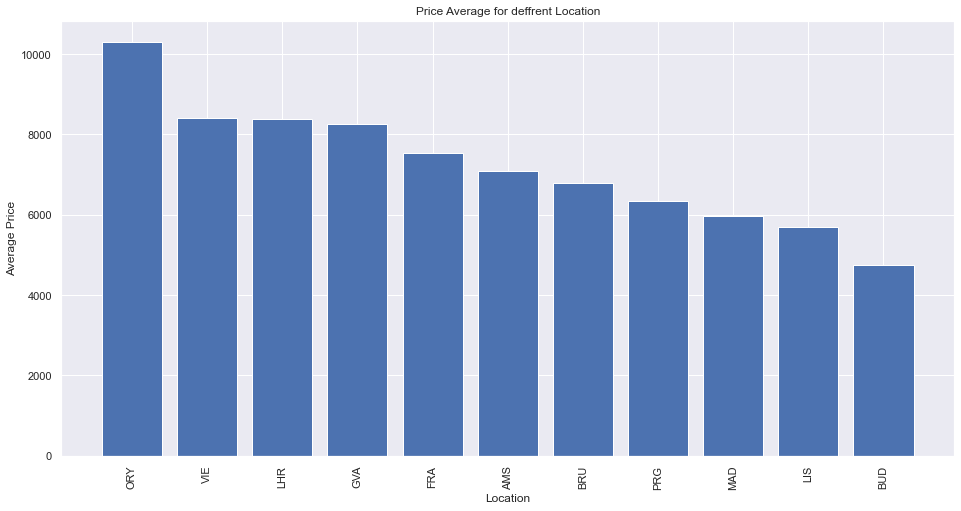

In [31]:
plt.figure(figsize=(16,8))
plt.bar(filghts_df_location['Location'].unique(),filghts_df_location["Price_NEW"])
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.xlabel('Location')
plt.title('Price Average for deffrent Location');

Next plot between the airline companies and the avarige price.

In [32]:
filghts_df_airline = (filghts_df.groupby(["Ariline"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
filghts_df_airline

,Ariline,Price_NEW
0,Air Canada,14344.000000
4,Corsair International,13329.500000
2,Austrian,9829.138554
13,Lufthansa,9529.963768
19,SWISS International Airlines,9068.662069
1,Air France,8280.965318
20,Saudia,8202.583804
3,British Airways,7623.688525
6,Emirates,7428.738806
15,Oman Air,7299.000000


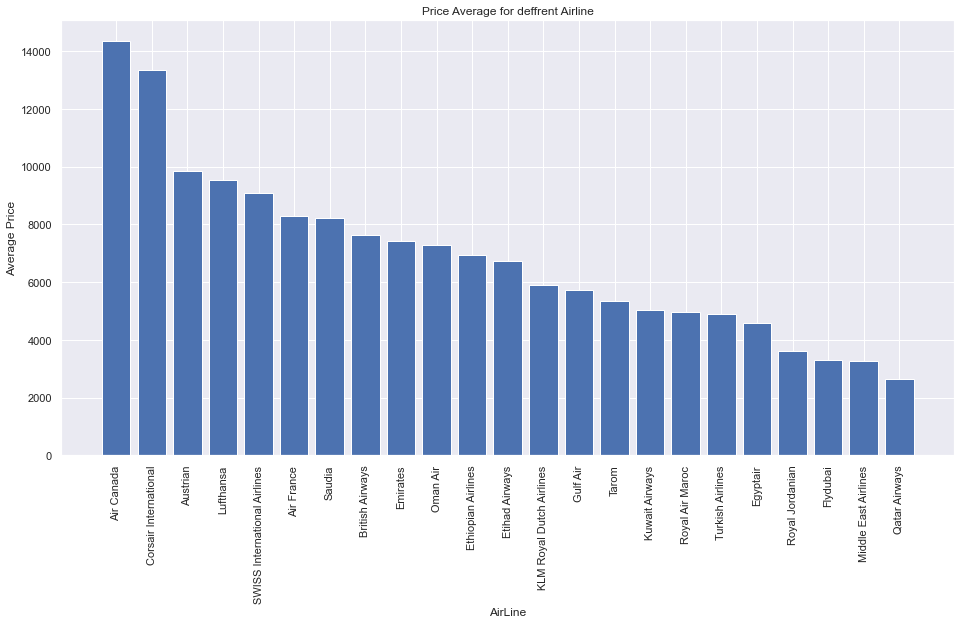

In [33]:
# there are 23 airlines
plt.figure(figsize=(16,8))
plt.bar(filghts_df_airline['Ariline'].unique(),filghts_df_airline["Price_NEW"])
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.xlabel('AirLine')
plt.title('Price Average for deffrent Airline');

The relation between the average prive and the number of stops as following

In [34]:
filghts_df_stops = (filghts_df.groupby(["Number_of_Stops"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
filghts_df_stops

,Number_of_Stops,Price_NEW
3,Direct,8213.725806
2,2 Stops,7686.164901
1,1 Stop,6881.404566
0,+2 Stops,4978.569343


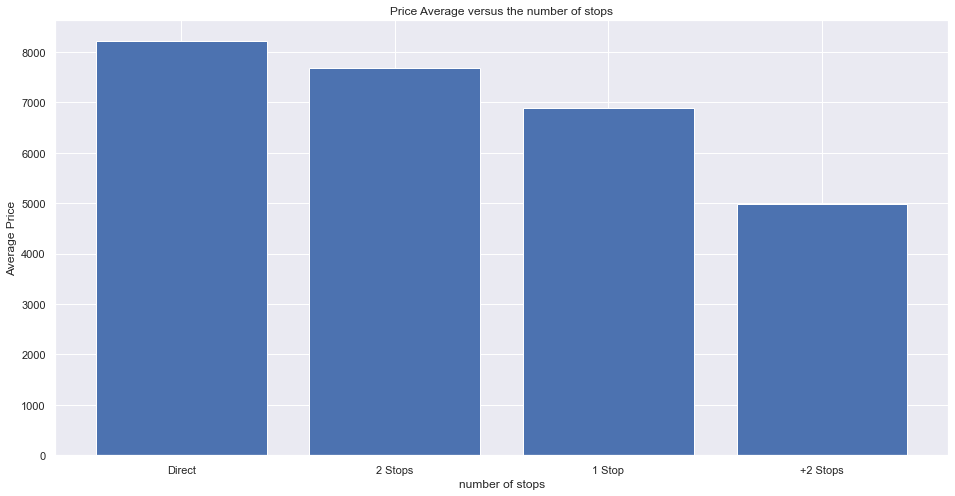

In [35]:
plt.figure(figsize=(16,8))
plt.bar(filghts_df_stops['Number_of_Stops'].unique(),filghts_df_stops["Price_NEW"])
plt.ylabel('Average Price')
plt.xlabel('number of stops')
plt.title('Price Average versus the number of stops');

From the above figure, the Direct flight has the highest price.

The next plot will show the relation between the baggage wight and the average price.

In [36]:
filghts_df_baggage = (filghts_df.groupby(["Baggage"],as_index=False).Price_NEW.mean()).sort_values("Price_NEW", ascending=False)
filghts_df_baggage

,Baggage,Price_NEW
7,Baggage included (50KG),11967.666667
6,Baggage included (46KG),10364.784367
8,Baggage included (60KG),10014.144231
5,Baggage included (40KG),9389.603954
4,Baggage included (35KG),6621.685714
0,Baggage included (20KG),6096.225694
3,Baggage included (30KG),3046.696231
1,Baggage included (23KG),2931.534591
9,Not included,2792.645933
2,Baggage included (25KG),2217.459259


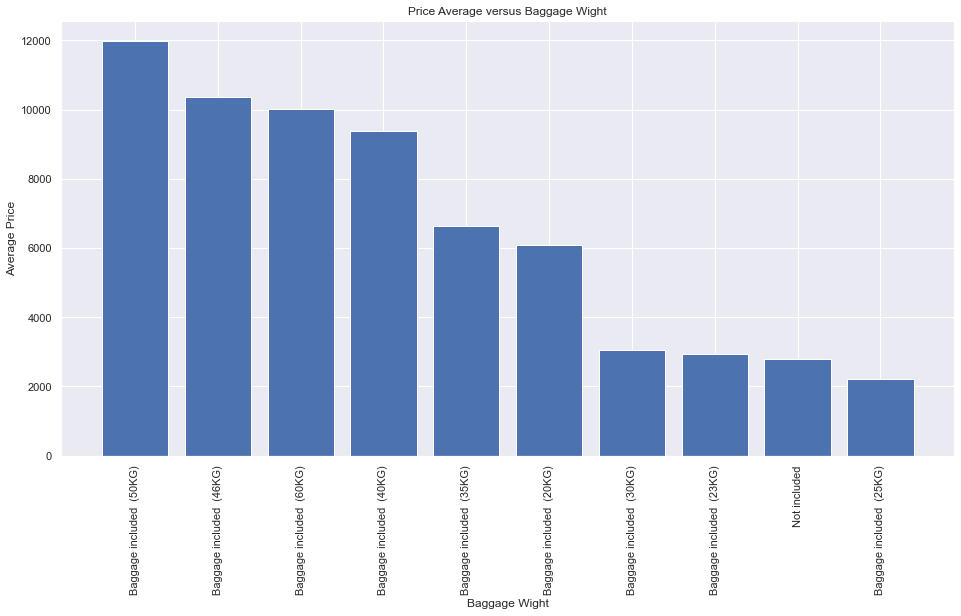

In [37]:
plt.figure(figsize=(16,8))
plt.bar(filghts_df_baggage['Baggage'].unique(),filghts_df_baggage["Price_NEW"])
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.xlabel('Baggage Wight')
plt.title('Price Average versus Baggage Wight');

Now we would like to add new column which has weekday and weekend. where the weekend in our case will be 3 days, which are Friday, Saturday and sunday, becouse they have the highest price as shown previosly.

In [38]:
filghts_df.insert(5, "Day_type", filghts_df["Day"])
filghts_df["Day_type"] = filghts_df["Day_type"].str.replace('Saturday', 'WeekEnd').str.replace('Friday', 'WeekEnd')\
.str.replace('Sunday', 'WeekEnd')

filghts_df["Day_type"] = filghts_df["Day_type"].str.replace('Monday', 'WeekDay').str.replace('Tuesday', 'WeekDay')\
.str.replace('Wednesday', 'WeekDay').str.replace('Thursday', 'WeekDay')

filghts_df

<ipython-input-38-78c2fc5421f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filghts_df["Day_type"] = filghts_df["Day_type"].str.replace('Saturday', 'WeekEnd').str.replace('Friday', 'WeekEnd')\
<ipython-input-38-78c2fc5421f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filghts_df["Day_type"] = filghts_df["Day_type"].str.replace('Monday', 'WeekDay').str.replace('Tuesday', 'WeekDay')\


,Flight_Number,Ariline,Class,Date,Day,Day_type,Time_of_take_off,Time_of_arrival,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,WeekDay,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,WeekDay,02:45pm,02:10am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,WeekDay,01:30pm,03:40am,1 Stop,12h 10m,730,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,WeekDay,06:10pm,05:45am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,WeekDay,11:25am,11:40pm,1 Stop,10h 15m,615,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,WeekDay,05:30am,04:40am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,WeekDay,07:50am,09:10pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,06:50pm,07:55pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,02:10pm,07:55pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


Changing the take-off time and the time of arrivale to AM and PM

In [39]:
filghts_df.insert (7, "Time_of_take_off_AM_PM", filghts_df["Time_of_take_off"])
filghts_df['Time_of_take_off_AM_PM'] = filghts_df['Time_of_take_off'].apply(lambda x : x[5:])
filghts_df.insert (9, "Time_of_arrival_AM_PM", filghts_df["Time_of_arrival"])
filghts_df['Time_of_arrival_AM_PM'] = filghts_df['Time_of_arrival'].apply(lambda x : x[5:])

filghts_df

<ipython-input-39-6165d284d20d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filghts_df['Time_of_take_off_AM_PM'] = filghts_df['Time_of_take_off'].apply(lambda x : x[5:])
<ipython-input-39-6165d284d20d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filghts_df['Time_of_arrival_AM_PM'] = filghts_df['Time_of_arrival'].apply(lambda x : x[5:])


,Flight_Number,Ariline,Class,Date,Day,Day_type,Time_of_take_off,Time_of_take_off_AM_PM,Time_of_arrival,Time_of_arrival_AM_PM,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,WeekDay,02:45pm,pm,02:10am,am,1 Stop,09h 25m,565,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,WeekDay,02:45pm,pm,02:10am,am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,WeekDay,01:30pm,pm,03:40am,am,1 Stop,12h 10m,730,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,WeekDay,06:10pm,pm,05:45am,am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,WeekDay,11:25am,am,11:40pm,pm,1 Stop,10h 15m,615,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,WeekDay,05:30am,am,04:40am,am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,WeekDay,07:50am,am,09:10pm,pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,06:50pm,pm,07:55pm,pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,02:10pm,pm,07:55pm,pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


In [40]:
Economy_df = filghts_df[filghts_df.Class == "Economy"]
Business_df = filghts_df[filghts_df.Class == "Business"]
Economy_df

,Flight_Number,Ariline,Class,Date,Day,Day_type,Time_of_take_off,Time_of_take_off_AM_PM,Time_of_arrival,Time_of_arrival_AM_PM,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,WeekDay,02:45pm,pm,02:10am,am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,WeekDay,06:10pm,pm,05:45am,am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
5,QR-68,Qatar Airways,Economy,2021-12-01,Wednesday,WeekDay,03:25pm,pm,02:40am,am,1 Stop,09h 15m,555,Baggage included (25KG),FRA,RUH,"SAR2,260",2260
7,KL-1764,KLM Royal Dutch Airlines,Economy,2021-12-01,Wednesday,WeekDay,10:15am,am,10:30pm,pm,1 Stop,10h 15m,615,Not included,FRA,RUH,"SAR2,068",2068
8,EK-46,Emirates,Economy,2021-12-01,Wednesday,WeekDay,02:30pm,pm,02:25am,am,1 Stop,09h 55m,595,Baggage included (30KG),FRA,RUH,"SAR2,225",2225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,WeekDay,05:30am,am,04:40am,am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,WeekDay,07:50am,am,09:10pm,pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,06:50pm,pm,07:55pm,pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,02:10pm,pm,07:55pm,pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


Analizing the ralation between time of take-off and arrivale and average price.

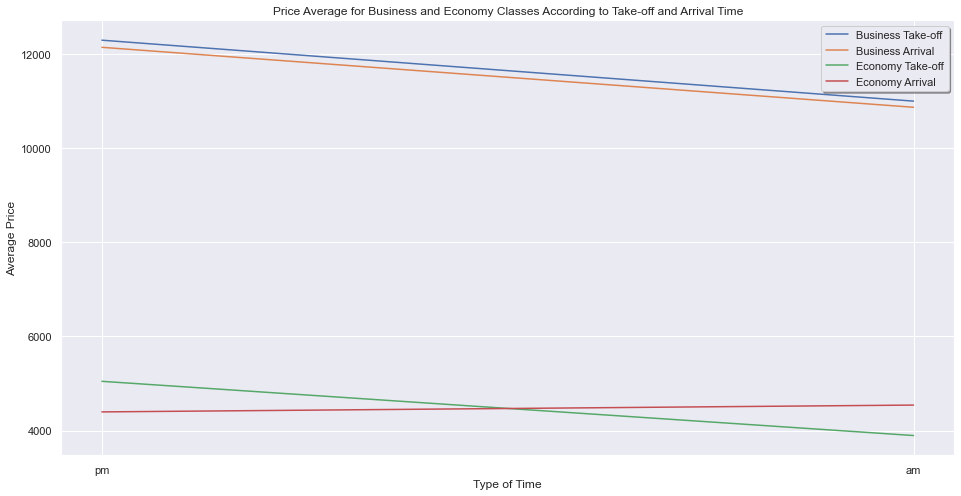

In [41]:
plt.figure(figsize=(16,8))
plt.plot(Business_df['Time_of_take_off_AM_PM'].unique(),Business_df.groupby("Time_of_take_off_AM_PM")['Price_NEW'].mean())
plt.plot(Business_df['Time_of_arrival_AM_PM'].unique(), Business_df.groupby("Time_of_arrival_AM_PM")['Price_NEW'].mean())
plt.plot(Economy_df['Time_of_take_off_AM_PM'].unique(),Economy_df.groupby("Time_of_take_off_AM_PM")['Price_NEW'].mean())
plt.plot(Economy_df['Time_of_arrival_AM_PM'].unique(), Economy_df.groupby("Time_of_arrival_AM_PM")['Price_NEW'].mean())
plt.ylabel('Average Price')
plt.xlabel('Type of Time')
plt.legend(['Business Take-off',"Business Arrival",'Economy Take-off' , "Economy Arrival"],shadow = True, loc = 0);
plt.title('Price Average for Business and Economy Classes According to Take-off and Arrival Time');

Finaly in this part, the unwanted columns will be droped such as the flight number, the destination since it is only one, the date and the day.

In [42]:
filghts_df

,Flight_Number,Ariline,Class,Date,Day,Day_type,Time_of_take_off,Time_of_take_off_AM_PM,Time_of_arrival,Time_of_arrival_AM_PM,Number_of_Stops,Duration,Duration_Minutes,Baggage,Location,Destination,Price,Price_NEW
0,RJ-126,Royal Jordanian,Business,2021-12-01,Wednesday,WeekDay,02:45pm,pm,02:10am,am,1 Stop,09h 25m,565,Baggage included (40KG),FRA,RUH,"SAR4,970",4970
1,RJ-126,Royal Jordanian,Economy,2021-12-01,Wednesday,WeekDay,02:45pm,pm,02:10am,am,1 Stop,09h 25m,565,Baggage included (20KG),FRA,RUH,"SAR1,808",1808
2,MS-9000,Egyptair,Business,2021-12-01,Wednesday,WeekDay,01:30pm,pm,03:40am,am,1 Stop,12h 10m,730,Baggage included (40KG),FRA,RUH,"SAR3,927",3927
3,TK-1594,Turkish Airlines,Economy,2021-12-01,Wednesday,WeekDay,06:10pm,pm,05:45am,am,1 Stop,09h 35m,575,Baggage included (30KG),FRA,RUH,"SAR1,962",1962
4,BA-903,British Airways,Business,2021-12-01,Wednesday,WeekDay,11:25am,am,11:40pm,pm,1 Stop,10h 15m,615,Baggage included (40KG),FRA,RUH,"SAR6,258",6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,AF-1125,Saudia,Economy,2021-12-07,Tuesday,WeekDay,05:30am,am,04:40am,am,2 Stops,20h 10m,1210,Baggage included (23KG),LIS,RUH,"SAR3,749",3749
3982,MS-9436,Egyptair,Economy,2021-12-07,Tuesday,WeekDay,07:50am,am,09:10pm,pm,2 Stops,34h 20m,2060,Baggage included (40KG),LIS,RUH,"SAR3,796",3796
3983,LH-6957,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,06:50pm,pm,07:55pm,pm,1 Stop,22h 05m,1325,Baggage included (20KG),LIS,RUH,"SAR5,444",5444
3984,LH-1779,Lufthansa,Economy,2021-12-07,Tuesday,WeekDay,02:10pm,pm,07:55pm,pm,2 Stops,26h 45m,1605,Baggage included (20KG),LIS,RUH,"SAR5,710",5710


In [43]:
filghts_df.drop(["Flight_Number", "Date", "Day","Time_of_take_off","Time_of_arrival","Duration","Destination","Price"],axis='columns', inplace=True)
filghts_df

C:\Users\ali_m\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Ariline,Class,Day_type,Time_of_take_off_AM_PM,Time_of_arrival_AM_PM,Number_of_Stops,Duration_Minutes,Baggage,Location,Price_NEW
0,Royal Jordanian,Business,WeekDay,pm,am,1 Stop,565,Baggage included (40KG),FRA,4970
1,Royal Jordanian,Economy,WeekDay,pm,am,1 Stop,565,Baggage included (20KG),FRA,1808
2,Egyptair,Business,WeekDay,pm,am,1 Stop,730,Baggage included (40KG),FRA,3927
3,Turkish Airlines,Economy,WeekDay,pm,am,1 Stop,575,Baggage included (30KG),FRA,1962
4,British Airways,Business,WeekDay,am,pm,1 Stop,615,Baggage included (40KG),FRA,6258
...,...,...,...,...,...,...,...,...,...,...
3981,Saudia,Economy,WeekDay,am,am,2 Stops,1210,Baggage included (23KG),LIS,3749
3982,Egyptair,Economy,WeekDay,am,pm,2 Stops,2060,Baggage included (40KG),LIS,3796
3983,Lufthansa,Economy,WeekDay,pm,pm,1 Stop,1325,Baggage included (20KG),LIS,5444
3984,Lufthansa,Economy,WeekDay,pm,pm,2 Stops,1605,Baggage included (20KG),LIS,5710


## Regression

This part of the notebook will show deffrent regression models to choose the best one for predecting the price of fight.

First, we need to find the corrilation of the data, in this case we have only two numarical values which are the price and the duration of the flight. Frome belowm as the duration increase the price will increase.

In [44]:
filghts_df.corr()

,Duration_Minutes,Price_NEW
Duration_Minutes,1.00000,-0.10218
Price_NEW,-0.10218,1.00000


To check the relation between the duration and the price we could split the economy and the business classes.

In [45]:
Economy_df.corr()

,Duration_Minutes,Price_NEW
Duration_Minutes,1.000000,-0.213469
Price_NEW,-0.213469,1.000000


In [46]:
Business_df.corr()

,Duration_Minutes,Price_NEW
Duration_Minutes,1.000000,-0.122975
Price_NEW,-0.122975,1.000000


It is clear that the price and the duration have invers relationship.

The pair plot for the above corrilation is shown below.

* Corrilation pairplot for all DataFrame.

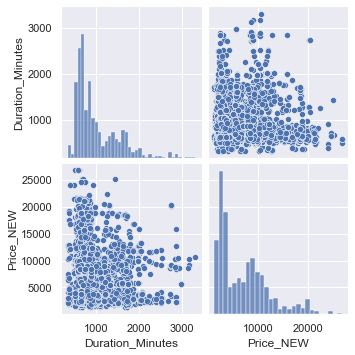

In [47]:
sns.pairplot(filghts_df);

* Corrilation pairplot for Business class only.

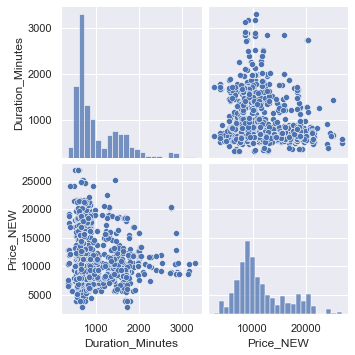

In [48]:
sns.pairplot(Business_df);

* Corrilation pairplot for Economy class only.

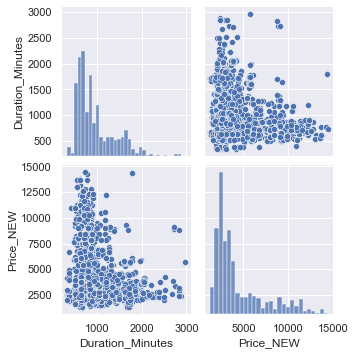

In [49]:
sns.pairplot(Economy_df);

To find the coeffietionet of our feature here which is the duration of the flight to predect the target which is the price we can use OLS to check the R^2 as will.

In [50]:
m = sm.OLS(filghts_df['Price_NEW'], filghts_df[["Duration_Minutes"]] , data = filghts_df)
re = m.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_NEW   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.499
Method:                 Least Squares   F-statistic:                              3886.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:06:10   Log-Likelihood:                         -39579.
No. Observations:                3899   AIC:                                  7.916e+04
Df Residuals:                    3898   BIC:                                  7.917e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Duration_Minutes     5.6507      0.091     62.337      0.000       5.473       5.828
==============================================================================
Omnibus:                      281.574   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.113
Skew:                           0.687   Prob(JB):                     4.22e-76
Kurtosis:                       3.499   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

First, we would like to see the R^2 for two regression models befor converting the caregrical columns to dummy.

1- Linear Regression

In [51]:
df_train, df_val = train_test_split(filghts_df, test_size=0.25, random_state=3)
lm = LinearRegression()
lm.fit(df_train[["Duration_Minutes"]],df_train['Price_NEW'])
print("Linear Regression training R^2 : ",lm.score(df_train[['Duration_Minutes']],df_train['Price_NEW']))
print("Linear Regression validation R^2 : ",lm.score(df_val[['Duration_Minutes']],df_val['Price_NEW']))

Linear Regression training R^2 :  0.009626913019299077
Linear Regression validation R^2 :  0.012360845461281245


It is clear that the machine has not learned much, it is obviose becuase there is only one numarical feature

2- Polynomial Regression

In [52]:
for i in range(2,7):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(df_train[["Duration_Minutes"]])
    X_val_poly = poly.transform(df_val[['Duration_Minutes']])

    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly,df_train['Price_NEW'])
    lr_poly.score(X_train_poly,df_train['Price_NEW'])
    
    print("====== Degree ",i,"======")
    print("Polynomial (",i,") Regression training R^2 : ",lr_poly.score(X_train_poly,df_train['Price_NEW']))
    print("Polynomial (",i,") Regression validation R^2 : ",lr_poly.score(X_val_poly, df_val['Price_NEW']))

====== Degree  2 ======
Polynomial ( 2 ) Regression training R^2 :  0.03511612854219004
Polynomial ( 2 ) Regression validation R^2 :  0.04319953055627268
====== Degree  3 ======
Polynomial ( 3 ) Regression training R^2 :  0.03522769429171879
Polynomial ( 3 ) Regression validation R^2 :  0.04300183666790924
====== Degree  4 ======
Polynomial ( 4 ) Regression training R^2 :  0.03706393698966759
Polynomial ( 4 ) Regression validation R^2 :  0.04445401690317974
====== Degree  5 ======
Polynomial ( 5 ) Regression training R^2 :  0.037075163421135815
Polynomial ( 5 ) Regression validation R^2 :  0.04382018006695931
====== Degree  6 ======
Polynomial ( 6 ) Regression training R^2 :  0.036562410964197545
Polynomial ( 6 ) Regression validation R^2 :  0.04427312114745052


The R^2 has been increased, and best degree is 5 where the model scored highies training and then decrease for higher degree.

Now we need to increase the number of featurs by converting the catigrical columns into dummy variables.

In [53]:
filghts_df

,Ariline,Class,Day_type,Time_of_take_off_AM_PM,Time_of_arrival_AM_PM,Number_of_Stops,Duration_Minutes,Baggage,Location,Price_NEW
0,Royal Jordanian,Business,WeekDay,pm,am,1 Stop,565,Baggage included (40KG),FRA,4970
1,Royal Jordanian,Economy,WeekDay,pm,am,1 Stop,565,Baggage included (20KG),FRA,1808
2,Egyptair,Business,WeekDay,pm,am,1 Stop,730,Baggage included (40KG),FRA,3927
3,Turkish Airlines,Economy,WeekDay,pm,am,1 Stop,575,Baggage included (30KG),FRA,1962
4,British Airways,Business,WeekDay,am,pm,1 Stop,615,Baggage included (40KG),FRA,6258
...,...,...,...,...,...,...,...,...,...,...
3981,Saudia,Economy,WeekDay,am,am,2 Stops,1210,Baggage included (23KG),LIS,3749
3982,Egyptair,Economy,WeekDay,am,pm,2 Stops,2060,Baggage included (40KG),LIS,3796
3983,Lufthansa,Economy,WeekDay,pm,pm,1 Stop,1325,Baggage included (20KG),LIS,5444
3984,Lufthansa,Economy,WeekDay,pm,pm,2 Stops,1605,Baggage included (20KG),LIS,5710


In [54]:
filghts_df_dummy = pd.get_dummies(filghts_df, drop_first = True)

In [55]:
filghts_df_dummy

,Duration_Minutes,Price_NEW,Ariline_Air France,Ariline_Austrian,Ariline_British Airways,Ariline_Corsair International,Ariline_Egyptair,Ariline_Emirates,Ariline_Ethiopian Airlines,Ariline_Etihad Airways,...,Location_BRU,Location_BUD,Location_FRA,Location_GVA,Location_LHR,Location_LIS,Location_MAD,Location_ORY,Location_PRG,Location_VIE
0,565,4970,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,565,1808,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,730,3927,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,575,1962,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,615,6258,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,1210,3749,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3982,2060,3796,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3983,1325,5444,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3984,1605,5710,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


After converting the categrical coulumns into dummy, we have ended up with 50 coulumns.

In [56]:
X = filghts_df_dummy.drop(["Price_NEW"],axis=1)
y = filghts_df_dummy["Price_NEW"]

m = sm.OLS(y,X, data = filghts_df_dummy)
re = m.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_NEW   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              595.2
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:06:10   Log-Likelihood:                         -36738.
No. Observations:                3899   AIC:                                  7.357e+04
Df Residuals:                    3850   BIC:                                  7.388e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Duration_Minutes                        -1.1135      0.149     -7.463      0.000      -1.406      -0.821
Ariline_Air France                    1.316e+04    513.558     25.621      0.000    1.22e+04    1.42e+04
Ariline_Austrian                      1.389e+04    456.176     30.452      0.000     1.3e+04    1.48e+04
Ariline_British Airways               1.159e+04    476.378     24.331      0.000    1.07e+04    1.25e+04
Ariline_Corsair International         1.484e+04   2188.630      6.779      0.000    1.05e+04    1.91e+04
Ariline_Egyptair                      7798.8059    574.476     13.576      0.000    6672.499    8925.112
Ariline_Emirates                      1.129e+04    487.253     23.179      0.000    1.03e+04    1.22e+04
Ariline_Ethiopian Airlines            8123.3702    703.898     11.541      0.000    6743.321    9503.420
Ariline_Etihad Airways                9938.6194    507.029     19.602      0.000    8944.549    1.09e+04
Ariline_Flydubai                      1.251e+04    991.387     12.615      0.000    1.06e+04    1.45e+04
Ariline_Gulf Air                      7630.2901    596.327     12.795      0.000    6461.144    8799.437
Ariline_KLM Royal Dutch Airlines      1.059e+04    511.425     20.713      0.000    9590.681    1.16e+04
Ariline_Kuwait Airways                7611.1834   1035.275      7.352      0.000    5581.443    9640.924
Ariline_Lufthansa                     1.242e+04    441.101     28.152      0.000    1.16e+04    1.33e+04
Ariline_Middle East Airlines           1.05e+04   3056.932      3.435      0.001    4508.245    1.65e+04
Ariline_Oman Air                      9491.3862   1815.242      5.229      0.000    5932.459    1.31e+04
Ariline_Qatar Airways                  1.06e+04    690.998     15.344      0.000    9247.904     1.2e+04
Ariline_Royal Air Maroc               5034.8886    788.779      6.383      0.000    3488.424    6581.354
Ariline_Royal Jordanian               5800.3179    631.562      9.184      0.000    4562.089    7038.546
Ariline_SWISS International Airlines  1.184e+04    507.130     23.340      0.000    1.08e+04    1.28e+04
Ariline_Saudia                        9752.5212    792.290     12.309      0.000    8199.173    1.13e+04
Ariline_Tarom                         1.355e+04   3057.237      4.431      0.000    7554.108    1.95e+04
Ariline_Turkish Airlines              8937.8409    478.586     18.676      0.000    7999.534    9876.148
Class_Economy                        -4744.4473    237.613    -19.967      0.000   -5210.306   -4278.589
Day_type_WeekEnd                       648.8966     99.461      6.524      0.000     453.896     843.897
Time_of_take_off_AM_PM_pm             -436.2

From above, there are two featurs that has low effect in the target, which are the location BRU which has low coef and larg P, and number of stops 1.

# Regression after dummy

Splitting the data into 3 parts: 60% training, 20% validation , 20% testing.

In [57]:
X = filghts_df_dummy.drop(["Price_NEW"],axis=1)
y = filghts_df_dummy["Price_NEW"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [58]:
X_train.head()

,Duration_Minutes,Ariline_Air France,Ariline_Austrian,Ariline_British Airways,Ariline_Corsair International,Ariline_Egyptair,Ariline_Emirates,Ariline_Ethiopian Airlines,Ariline_Etihad Airways,Ariline_Flydubai,...,Location_BRU,Location_BUD,Location_FRA,Location_GVA,Location_LHR,Location_LIS,Location_MAD,Location_ORY,Location_PRG,Location_VIE
829,715,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3752,2030,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3605,645,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3887,2030,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1880,1418,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly3 = PolynomialFeatures(degree=3) 
X_train_poly3 = poly3.fit_transform(X_train.values)
X_val_poly3 = poly3.transform(X_val.values)
X_test_poly3 = poly3.transform(X_test.values)

lm_poly = LinearRegression()


lm_reg = Ridge(alpha=1)

lm_lasso = Lasso(alpha = 100)

In [60]:
print("====Linear Regression====")
lm.fit(X_train, y_train)
print(f'Linear Regression training R^2: {lm.score(X_train,y_train):.3f}')
print(f'Linear Regression validation R^2: {lm.score(X_val, y_val):.3f}')

print("====Degree 2 polynomial regression====")
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression training R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression validation R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

print("====Degree 3 polynomial regression====")
lm_poly.fit(X_train_poly3, y_train)
print(f'Degree 3 polynomial regression training R^2: {lm_poly.score(X_train_poly3, y_train):.3f}')
print(f'Degree 3 polynomial regression validation R^2: {lm_poly.score(X_val_poly3, y_val):.3f}')

print("====Ridge Regression====")
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression training R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression validation R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

print("====Lasso Regression====")
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression training R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression validation R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

====Linear Regression====
Linear Regression training R^2: 0.659
Linear Regression validation R^2: 0.654
====Degree 2 polynomial regression====
Degree 2 polynomial regression training R^2: 0.827
Degree 2 polynomial regression validation R^2: -4911972.004
====Degree 3 polynomial regression====
Degree 3 polynomial regression training R^2: 0.921
Degree 3 polynomial regression validation R^2: -282.521
====Ridge Regression====
Ridge Regression training R^2: 0.658
Ridge Regression validation R^2: 0.657
====Lasso Regression====
Lasso Regression training R^2: 0.635
Lasso Regression validation R^2: 0.645


Check the above values with cross validation

In [61]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
linearC = cross_val_score(lm,X,y,cv= kf, scoring= "r2")
print("Cross validation for Linear Regression :",np.mean(linearC))


Cross validation for Linear Regression : 0.6465205498573565


In [62]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
ridgeC = cross_val_score(lm_reg,X,y,cv= kf, scoring= "r2")
print("Cross validation for Ridge:",np.mean(ridgeC))

Cross validation for Ridge: 0.6473340255571522


In [63]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
lassoC = cross_val_score(lm_lasso,X,y,cv= kf, scoring= "r2")
print("Cross validation for Linear Regression :",np.mean(lassoC))

Cross validation for Linear Regression : 0.5495126345553858


From above, Ridge is the best model so far, but we will try more models

LassoCV:

In [64]:
alphavec = 10**np.linspace(-2,2,200)

lassoCV_model = LassoCV(alphas = alphavec, cv=5)
lassoCV_model.fit(X_train_scaled, y_train)
print("LassoCV Regression training R^2",lassoCV_model.score(X_train_scaled, y_train))
print("LassoCV Regression validation R^2",lassoCV_model.score(X_val_scaled, y_val))
print("Best alpha:", lassoCV_model.alpha_)

LassoCV Regression training R^2 0.6558500445170106
LassoCV Regression validation R^2 0.6574929708983228
Best alpha: 5.672426068491977


RidgeCV

In [65]:
alphavec = 10**np.linspace(-2,2,200)

ridgeCV_model = RidgeCV(alphas = alphavec, cv=5)
ridgeCV_model.fit(X_train_scaled, y_train)
print("LassoCV Regression training R^2",ridgeCV_model.score(X_train_scaled, y_train))
print("LassoCV Regression validation R^2",ridgeCV_model.score(X_val_scaled, y_val))
print("Best alpha:", ridgeCV_model.alpha_)

LassoCV Regression training R^2 0.6553049695142044
LassoCV Regression validation R^2 0.6574126315721402
Best alpha: 39.626886387014785


ElasticNet

Elastic Net Grid Search


C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8098989528.6829405, tolerance: 4862436.331376911
  model = cd_fast.enet_coordinate_descent(
C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8397026428.2331705, tolerance: 4884863.904697167
  model = cd_fast.enet_coordinate_descent(
C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8794453202.635044, tolerance: 5086163.760642438
  model = cd_fast.enet_coordinate_descent(
C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

ElasticNet Regression: 0.6575003793828835


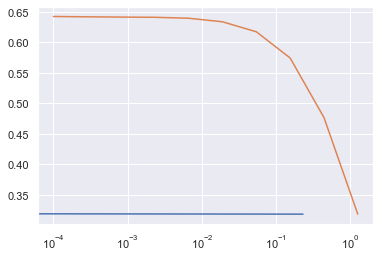

In [66]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
        plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

y_pred = elastic_net_grid_est.predict(X_val)
print("ElasticNet Regression:", r2_score(y_val, y_pred))

In [67]:
#elastic_net_grid_est.alpha_

AttributeError: 'GridSearchCV' object has no attribute 'alpha_'

Random Forest

In [68]:
rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("Random Forest Regression validation:", r2_score(y_val, y_pred))

Random Forest Regression validation: 0.44529213677115964


C:\Users\ali_m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


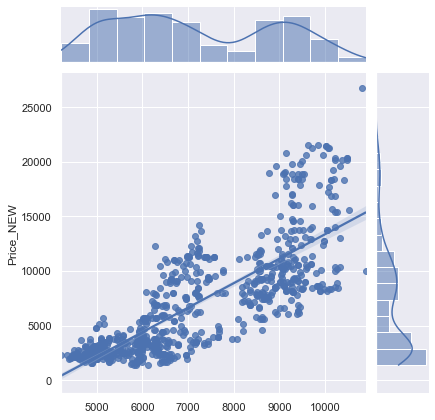

In [69]:
sns.jointplot(y_pred, y_val, kind='reg');

Gradient Boost

In [70]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_val)
print("Gradient Boosted Regression:", r2_score(y_val, y_pred))

Gradient Boosted Regression: 0.6935047452812748


C:\Users\ali_m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


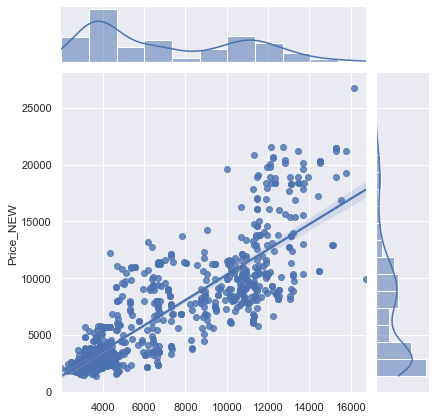

In [71]:
sns.jointplot(y_pred, y_val, kind='reg');

From above, the best regression model is Gradient Boost, but the value of R^2 is close to the linear, Ridge and the lasso. therefor, we would like to apply the test on all of them to see the result after training using the training and validation data.

# TEST

In [72]:
lm = LinearRegression()

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg_best = Ridge(alpha=39.626886387014785)

lm_lasso_best = Lasso(alpha = 5.672426068491977)

In [73]:
print("====Linear Regression====")
lm.fit(X, y)
print(f'Linear Regression training & validation R^2: {lm.score(X,y):.3f}')
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

print("====Ridge Regression (best alpha)====")
lm_reg_best.fit(X_scaled, y)
print(f'Ridge Regression training & validation R^2: {lm_reg_best.score(X, y):.3f}')
print(f'Ridge Regression test R^2: {lm_reg_best.score(X_test_scaled, y_test):.3f}')

print("====Lasso Regression (best alpha)====")
lm_lasso_best.fit(X_scaled, y)
print(f'Lasso Regression training & validation R^2: {lm_lasso_best.score(X, y):.3f}')
print(f'Lasso Regression test R^2: {lm_lasso_best.score(X_test_scaled, y_test):.3f}')

====Linear Regression====
Linear Regression training & validation R^2: 0.660
Linear Regression test R^2: 0.657
====Ridge Regression (best alpha)====
Ridge Regression training & validation R^2: -15324.767
Ridge Regression test R^2: 0.657
====Lasso Regression (best alpha)====
Lasso Regression training & validation R^2: -15444.396
Lasso Regression test R^2: 0.657


Testing the best model: Gradient Boosting

In [74]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X, y)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Gradient Boosted Regression: 0.6829880774337951


The best regression model is Gradient Boosting and after testing it gave us close value of R^2 to the one for the validation.